In [6]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [8]:
import cv2
import os, glob, numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf

img_dir = './binary_cnn/test'
categories = os.listdir(img_dir)

image_width = 128 # 사이즈 수정
image_height = 128

X = []
y = []
index = []
files = []
filenames = []

for i, category in enumerate(categories):
    img_detail = img_dir + '/' + category
    files.append(glob.glob(img_detail + "/*.jpg"))
    index.append(i)
    
for file, i in zip(files, index):
    for f in file:
        img = data_generator(f, image_width, image_height)
        data = np.asarray(img)

        head, tail = os.path.split(f)
        filenames.append(tail)
        
        X.append(data)
        y.append(i)
    
X = np.array(X)
y = np.array(y)

X = X.astype('float32') / 255

print(len(X), len(y))

"""인자 바꾸기"""



639 639


'인자 바꾸기'

In [9]:
#import keras.backend.tensorflow_backend as K

#with K.tf_ops.device('/device:GPU:0'):
 #   prediction = model.predict(X)
  #  np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지



In [10]:
def print_scores(y, prediction):
    print('confusion matrix 결과')
    print(confusion_matrix(y, prediction, labels=[0, 1])) # 0 : 광고 1: 비광고

    print('precision 개별값')
    print(list(map('{:2.2f}%'.format, precision_score(y, prediction, average=None) * 100))) # precision 개별 값
    print('recall 개별값')
    print(list(map('{:2.2f}%'.format, recall_score(y, prediction, average=None) * 100)))

    print('evaluate값')
    print('{:2.2f}%'.format(model.evaluate(X, y)[1] * 100))
    
    print('f1 점수')
    print('{:2.2f}%'.format(f1_score(y, prediction, average='macro') * 100))

    print('precision 평균값')
    print('{:2.2f}%'.format(precision_score(y, prediction, average='macro') * 100)) # precision 평균 값
    
    print('recall 평균값')
    print('{:2.2f}%'.format(recall_score(y, prediction, average='macro') * 100))

In [11]:
import keras.backend.tensorflow_backend as K

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

"""수정 필요한 부분"""

# validation_rate = [0.05, 0.1, 0.15, 0.2]  # 리스트 바꾸기
# batch_list = [2, 4, 8]
epochs = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
#image_size = [32, 40, 50, 64, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
  #           190, 200, 210, 220, 230, 240, 256]
# Dropout = []
#model_layers = [2, 3, 4, 5, 6, 7, 8, 9, 10]

model_evaluate = []
f1 = []
precision = []
recall = []

for epoch in epochs: #반복문 요소 바꾸기
    model = load_model('./binary_cnn/models/epochs/binary_model_saved' + str(epoch) + '.h5')
    ##############파일 인자 수정하기 ##############
    with K.tf_ops.device('/device:GPU:0'):
        prediction = model.predict(X)
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
    
    prediction = np.round(prediction)
    
    print('이미지 사이즈 : ' + size) # 수정
    print_scores(y, prediction)
    
    model_evaluate.append(model.evaluate(X, y)[1] * 100)
    precision.append(precision_score(y, prediction, average='macro') * 100)
    recall.append(recall_score(y, prediction, average='macro') * 100)
    f1.append(f1_score(y, prediction, average='macro') * 100)
    
"""수정 필요한 부분"""

confusion matrix 결과
[[298  21]
 [253  67]]
precision 개별값
['54.08%', '76.14%']
recall 개별값
['93.42%', '20.94%']
evaluate값
639/639 [==============================] - 1s 1ms/sample - loss: 6.8158 - acc: 0.5712
57.12%
f1 점수
50.67%
precision 평균값
65.11%
recall 평균값
57.18%
639/639 [==============================] - 0s 660us/sample - loss: 6.8158 - acc: 0.5712
confusion matrix 결과
[[314   5]
 [287  33]]
precision 개별값
['52.25%', '86.84%']
recall 개별값
['98.43%', '10.31%']
evaluate값
639/639 [==============================] - 1s 1ms/sample - loss: 7.2172 - acc: 0.5430
54.30%
f1 점수
43.35%
precision 평균값
69.54%
recall 평균값
54.37%
639/639 [==============================] - 0s 674us/sample - loss: 7.2172 - acc: 0.5430
confusion matrix 결과
[[315   4]
 [277  43]]
precision 개별값
['53.21%', '91.49%']
recall 개별값
['98.75%', '13.44%']
evaluate값
639/639 [==============================] - 1s 1ms/sample - loss: 3.5056 - acc: 0.5603
56.03%
f1 점수
46.29%
precision 평균값
72.35%
recall 평균값
56.09%
639/639 [====================

'수정 필요한 부분'

In [12]:
#for i, pred in enumerate(prediction):
 #   if pred >= 0.5: print("해당 " + filenames[i] + "  이미지는 비광고 로 추정됩니다.")
  #  else : print("해당 " + filenames[i] + "  이미지는 광고 로 추정됩니다.")

'수정 필요한 부분'

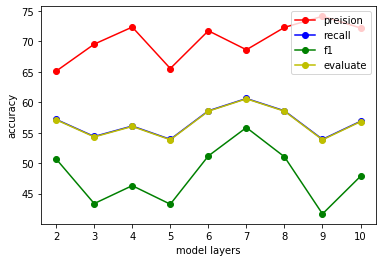

In [13]:
import matplotlib.pyplot as plt


"""수정 필요한 부분"""

plt.plot(epochs, precision, 'ro-', label='preision') # 리스트 수정
plt.plot(epochs, recall, 'bo-', label='recall')
plt.plot(epochs, f1, 'go-', label='f1')
plt.plot(epochs, model_evaluate, 'yo-', label='evaluate')
plt.xlabel('epochs') # xlabel 수정
plt.ylabel('accuracy')
plt.legend()

"""수정 필요한 부분"""